## Setup 

In [ ]:
import pandas as pd
from pandas.io import sql
import sqlite3
import timeit
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

! pwd

## DB Query

In [ ]:
# Create SQl DB connection
conn = sqlite3.connect('Shotlink.db')

In [80]:
# Query data for Tiger Woods
df = sql.read_sql("""SELECT * FROM PGA_stats 
                WHERE PlayerFullName = 'Woods, Tiger' 
                OR PlayerFullName = 'Mickelson, Phil'
                """, con=conn)
print(len(df))

109362


In [81]:
df.head()

,Tour Code,TourDescription,Year,Tourn.#,Player#,Course#,PermanentTournament#,PlayerFirstName,PlayerLastName,Round,TournamentName,CourseName,Hole,HoleScore,ParValue,Yardage,Shot,ShotType(S/P/D),#ofStrokes,FromLocation(Scorer),FromLocation(Enhanced),To Location(Scorer),ToLocation(Enhanced),Distance,DistancetoPin,IntheHoleFlag,AroundtheGreenFlag,1stPuttFlag,DistancetoHoleaftertheShot,Time,Lie,Elevation,Slope,X Coordinate,Y Coordinate,Z Coordinate,DistancefromCenter,DistancefromEdge,Date,Left/Right,StrokesGained/Baseline,StrokesGainedCategory,RecoveryShot,PlayerFullName,DistanceYds,DistancetoPinYds,DistancetoHoleaftertheShotYds,DistancefromEdgeYds,DistanceFt,DistancetoPinFt,DistancetoHoleaftertheShotFt,DistancefromEdgeFt,CourseYardage
0,R,PGA TOUR,2003,030,01810,510,003,Phil,Mickelson,1,Phoenix Open,TPC Scottsdale,1,4.0,04,410,1,S,1,Tee Box,0,Fairway,Right Fairway,10086,0,N,N,0,4987,1227,Good,With,Level,"8,806.6890","11,704.9240","1,003.0570",00000,0,00/00/0000,0,0.0,0,0,"Mickelson, Phil",280,0,138,0,840.5,0.0,415.6,0.0,7089
1,R,PGA TOUR,2003,030,01810,510,003,Phil,Mickelson,1,Phoenix Open,TPC Scottsdale,1,4.0,04,410,2,S,1,Fairway,Right Fairway,Green,Green,5037,4987,N,N,0,172,1234,Good,With,Level,"8,563.9810","12,047.3700","1,005.9070",00000,0,00/00/0000,0,0.0,0,0,"Mickelson, Phil",139,138,4,0,419.8,415.6,14.3,0.0,7089
2,R,PGA TOUR,2003,030,01810,510,003,Phil,Mickelson,1,Phoenix Open,TPC Scottsdale,1,4.0,04,410,3,S,1,Green,Green,Green,Green,188,172,N,N,Y,22,1238,Good,With,Level,"8,579.2430","12,050.7360","1,005.9890",00000,0,00/00/0000,0,0.0,0,0,"Mickelson, Phil",5,4,0,0,15.7,14.3,1.8,0.0,7089
3,R,PGA TOUR,2003,030,01810,510,003,Phil,Mickelson,1,Phoenix Open,TPC Scottsdale,1,4.0,04,410,4,S,1,Green,Green,0,0,22,22,Y,N,0,0,1238,Good,With,Level,.0000,.0000,.0000,00000,0,00/00/0000,0,0.0,0,0,"Mickelson, Phil",0,0,0,0,1.8,1.8,0.0,0.0,7089
4,R,PGA TOUR,2003,030,01810,510,003,Phil,Mickelson,1,Phoenix Open,TPC Scottsdale,2,4.0,04,416,1,S,1,Tee Box,0,Primary Rough,Left Rough,12009,0,N,N,0,2550,1241,Good,With,Level,"8,842.4330","11,136.1480",991.2170,00000,0,00/00/0000,0,0.0,0,0,"Mickelson, Phil",333,0,70,0,1000.8,0.0,212.5,0.0,7089


## Create 6 footer make percentage

In [ ]:
df_six_footers_try = df[(df['DistanceFt'] >= 6) & (df['DistanceFt'] < 7) & (df['FromLocation(Enhanced)'] == 'Green')]
df_six_footers_make= df[(df['DistanceFt'] >= 6) & (df['DistanceFt'] < 7) & (df['FromLocation(Enhanced)'] == 'Green') & (df['IntheHoleFlag'] == 'Y')]

In [ ]:
percent_made_6 = len(df_six_footers_make)/len(df_six_footers_try)
percent_made_6

## Create percent made for each foot

In [94]:
feet_list = []
perc_list = []
made_list = []
try_list = []
player_list = []

players = set(df['PlayerFullName'])

for player in players:
    for i in range(1,61):    
        df_i_footers_try = df[(df['DistanceFt'] >= i) & (df['DistanceFt'] < (int(i)+1)) & (df['FromLocation(Enhanced)'] == 'Green') & (df['PlayerFullName'] == player)]
        df_i_footers_make= df[(df['DistanceFt'] >= i) & (df['DistanceFt'] < (int(i)+1)) & (df['FromLocation(Enhanced)'] == 'Green') & (df['IntheHoleFlag'] == 'Y') & (df['PlayerFullName'] == player)]

        percent_made_i = len(df_i_footers_make)/len(df_i_footers_try)

        feet_list.append(i)
        perc_list.append(percent_made_i)
        made_list.append(len(df_i_footers_make))
        try_list.append(len(df_i_footers_try))
        player_list.append(player)
        
# Convert zipped list to pandas DF
putts_df_0 = pd.DataFrame(list(zip(feet_list, perc_list, made_list, try_list, player_list)),
              columns=['feet','percent_made', 'number_made', 'number_attempt', 'player'])

putts_df['probability_make'] = putts_df_0['percent_made']*100

putts_df

,feet,percent_made,number_made,number_attempt,player,probability_make
0,1,1.000000,682,682,"Mickelson, Phil",100.000000
1,2,0.995208,623,626,"Mickelson, Phil",99.520767
2,3,0.990798,323,326,"Mickelson, Phil",99.079755
3,4,0.970711,232,239,"Mickelson, Phil",97.071130
4,5,0.826087,152,184,"Mickelson, Phil",82.608696
5,6,0.761194,102,134,"Mickelson, Phil",76.119403
6,7,0.520833,75,144,"Mickelson, Phil",52.083333
7,8,0.457364,59,129,"Mickelson, Phil",45.736434
8,9,0.422222,57,135,"Mickelson, Phil",42.222222
9,10,0.400000,46,115,"Mickelson, Phil",40.000000


In [36]:
# Export to Folder
putts_df.to_csv('putts_df.csv')

## Putting from < 60 feet

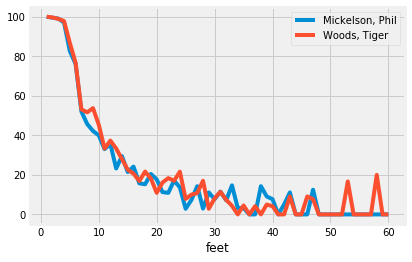

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()

for key, grp in putts_df.groupby(['player']):
    ax = grp.plot(ax=ax, kind='line', x='feet', y='probability_make', label=key)

plt.legend(loc='best')
plt.show()




## Putting from < 20 feet

In [149]:
# Create under 20 feet DF
under_20 = putts_df[putts_df['feet'] <= 20]

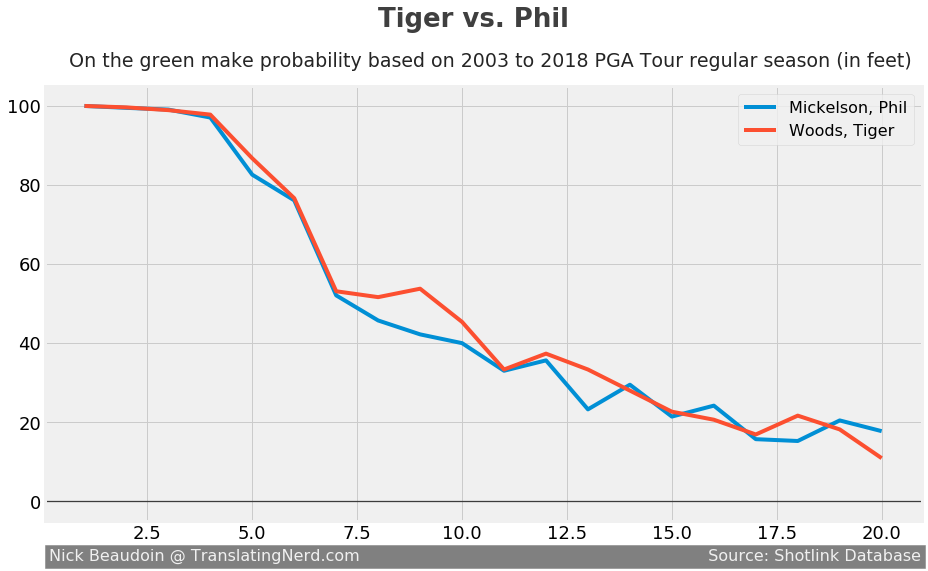

In [159]:
fig, ax = plt.subplots()

for key, grp in under_20.groupby(['player']):
    ax = grp.plot(ax=ax, kind='line', x='feet', y='probability_make', figsize = (14,8), label=key, fontsize=12)

plt.legend(loc='best', fontsize=16)

plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

plt.text(x=.15, y=-15, s = 'Nick Beaudoin @ TranslatingNerd.com                                                                    Source: Shotlink Database',                                                                    
    fontsize = 16, color = '#f0f0f0', backgroundcolor = 'grey')


plt.text(x = 5, y = 120, s = "              Tiger vs. Phil",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = -.5, y = 110, 
               s = '        On the green make probability based on 2003 to 2018 PGA Tour regular season (in feet)',
              fontsize = 19, alpha = .85)
plt.show()